# Data analysis basic examples

In [1]:
import statistics as st
import numpy
import sys
import pandas as pd
import matplotlib
from collections import defaultdict
numpy.set_printoptions(threshold=sys.maxsize)
numpy.set_printoptions(linewidth=500)

In [2]:
data_file = open("data/KarateClub.csv", "r")

In [3]:
# parse edges from data file

edges = []

for line in data_file :
    values = line.strip().split(";")
    edges.append(values)

In [4]:
edges = numpy.array(edges).astype(numpy.int32)

## Adjacency list

In [5]:
adjacency_dic = {}
for e in edges:
    if e[0] not in adjacency_dic:
        adjacency_dic[e[0]] = [e[1]]
    else:
        adjacency_dic[e[0]].append(e[1])
        
    if e[1] not in adjacency_dic:
        adjacency_dic[e[1]] = [e[0]]
    else:
        adjacency_dic[e[1]].append(e[0])
    
for key in sorted(adjacency_dic):
    print ("{} -> {}".format(key, adjacency_dic[key]))

1 -> [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]
2 -> [1, 3, 4, 8, 14, 18, 20, 22, 31]
3 -> [1, 2, 4, 8, 9, 10, 14, 28, 29, 33]
4 -> [1, 2, 3, 8, 13, 14]
5 -> [1, 7, 11]
6 -> [1, 7, 11, 17]
7 -> [1, 5, 6, 17]
8 -> [1, 2, 3, 4]
9 -> [1, 3, 31, 33, 34]
10 -> [3, 34]
11 -> [1, 5, 6]
12 -> [1]
13 -> [1, 4]
14 -> [1, 2, 3, 4, 34]
15 -> [33, 34]
16 -> [33, 34]
17 -> [6, 7]
18 -> [1, 2]
19 -> [33, 34]
20 -> [1, 2, 34]
21 -> [33, 34]
22 -> [1, 2]
23 -> [33, 34]
24 -> [26, 28, 30, 33, 34]
25 -> [26, 28, 32]
26 -> [24, 25, 32]
27 -> [30, 34]
28 -> [3, 24, 25, 34]
29 -> [3, 32, 34]
30 -> [24, 27, 33, 34]
31 -> [2, 9, 33, 34]
32 -> [1, 25, 26, 29, 33, 34]
33 -> [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34]
34 -> [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33]


## Adjacency matrix

In [6]:
# prepare matrix
size = edges.max()+1
matrix = numpy.zeros((size, size))

In [7]:
# fill matrix
matrix[edges[:,0], edges[:,1]] = 1
matrix[edges[:,1], edges[:,0]] = 1

In [8]:
# print matrix
print(matrix[1:,1:])

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Both axis (x,y) represent node numbers. Values in matrix mark adjacency - value of 1 means nodes are adjacent. 

## Edges List

In [9]:
print(edges)

[[ 2  1]
 [ 3  1]
 [ 3  2]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 7  5]
 [ 7  6]
 [ 8  1]
 [ 8  2]
 [ 8  3]
 [ 8  4]
 [ 9  1]
 [ 9  3]
 [10  3]
 [11  1]
 [11  5]
 [11  6]
 [12  1]
 [13  1]
 [13  4]
 [14  1]
 [14  2]
 [14  3]
 [14  4]
 [17  6]
 [17  7]
 [18  1]
 [18  2]
 [20  1]
 [20  2]
 [22  1]
 [22  2]
 [26 24]
 [26 25]
 [28  3]
 [28 24]
 [28 25]
 [29  3]
 [30 24]
 [30 27]
 [31  2]
 [31  9]
 [32  1]
 [32 25]
 [32 26]
 [32 29]
 [33  3]
 [33  9]
 [33 15]
 [33 16]
 [33 19]
 [33 21]
 [33 23]
 [33 24]
 [33 30]
 [33 31]
 [33 32]
 [34  9]
 [34 10]
 [34 14]
 [34 15]
 [34 16]
 [34 19]
 [34 20]
 [34 21]
 [34 23]
 [34 24]
 [34 27]
 [34 28]
 [34 29]
 [34 30]
 [34 31]
 [34 32]
 [34 33]]


## Incidence Matrix

In [10]:
# prepare matrix
incidence_matrix = numpy.zeros((edges.shape[0],edges.max()+1))

In [11]:
# fill matrix
for i, e in enumerate(edges): 
    incidence_matrix[i,e[0]] = 1
    incidence_matrix[i,e[1]] = 1
    

In [12]:
# print matrix
print(incidence_matrix[:,1:])

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Axis x represents node number. Axis y represents edge number. Values in matrix represent connection. 
### Each line includes nodes connected with a given edge.

## Vertex degree statistics

In [13]:
vertex_degrees = [len(v) for v in adjacency_dic.values()]
min_vertex_degree = min(vertex_degrees)
max_vertex_degree = max(vertex_degrees)
avg_vertex_degree = st.mean(vertex_degrees)

In [14]:
print("Minimal vertex degree of KarateCLub dataset is {}".format(min_vertex_degree))
print("Maximal vertex degree of KarateClub dataset is {}".format(max_vertex_degree))
print("Average vertex degree of KarateClub dataset is {:0.2f}".format(avg_vertex_degree))

Minimal vertex degree of KarateCLub dataset is 1
Maximal vertex degree of KarateClub dataset is 17
Average vertex degree of KarateClub dataset is 4.59


In [16]:
degrees_dic = defaultdict(lambda: 0)

for k,v in adjacency_dic.items():
    degrees_dic[len(v)]+=1
series = pd.Series(data=degrees_dic, index=adjacency_dic.keys())

2     11.0
1      1.0
3      6.0
4      6.0
5      3.0
6      2.0
7      NaN
8      NaN
9      1.0
10     1.0
11     NaN
12     1.0
13     NaN
14     NaN
17     1.0
18     NaN
20     NaN
22     NaN
26     NaN
24     NaN
25     NaN
28     NaN
29     NaN
30     NaN
27     NaN
31     NaN
32     NaN
33     NaN
15     NaN
16     1.0
19     NaN
21     NaN
23     NaN
34     NaN
dtype: float64


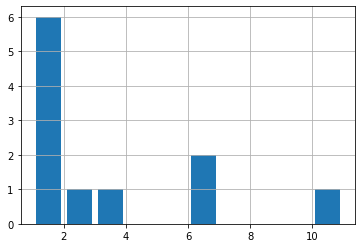

In [21]:
series.hist(rwidth=0.8)
print(series)

In [ ]:
print(series)